# Gapminder Dataset Analysis about Environmental Friendliness


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we will analyze the data related to 3 countries (Colombia, Japan, United States) taken from the [Gapminder World dataset](http://www.gapminder.org/data/), and perform a comparison in order to answer which one of these 3 countries is the most environmentally friendly.

More specifically, we would like to try to answer the following questions based on their respective dataset:
<ul>
<li>How do these 3 countries (Colombia, Japan, United States) compare in terms of annual CO2 emmitions per person?</li>
<li>How do these countries (Colombia, Japan, United States) compare in terms of annual residential electricity use per person?</li>
<li>How do these countries (Colombia, Japan, United States) compare in terms of percentage of annual electricity production from renewable sources?</li>
</ul>

In order to do this, we will download and use 3 different datasets, where the dependent variable is the year, and the independent variable is each one of the parameters described in the questions above, for each of the 3 target countries.

In [2]:
# Import statements of the required packages
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section we will check the general properties of the dataset, and perform some cleaning operations, such as reorganizing and removing unnecessary data.

### General Properties

First of all, let's load the dataset related to annual CO2 emissions per person.

In [3]:
# Load dataset about CO2 emissions per person
df = pd.read_csv("data/co2_emissions_tonnes_per_person.csv")

Now let's take a look at the first rows of the dataset.

In [4]:
df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0517,0.0624,0.0839,0.152,0.238,0.29,0.406,0.345,0.31,0.294
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2700,1.2900,1.460,1.470,1.56,1.790,1.680,1.74,1.970
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2400,3.0000,3.2000,3.170,3.440,3.31,3.310,3.480,3.53,3.740
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.12,5.870,5.920,5.90,5.830
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9860,1.1100,1.2000,1.190,1.230,1.24,1.250,1.330,1.25,1.290


It seems there are many rows with missing values, and also each year has been registered as a diferent column. For now, let's try to reorganize the year related information now, and deal with the missing values issue later.

We would like to have the year related information as a single column. So let's create another dataframe, called df_co2_emissions, where the year related information is contained within a single column.

In [5]:
df_co2_emissions = pd.DataFrame()
df_co2_emissions["year"] = pd.Series(df.columns[1:])

To confirm, let's check the first 5 rows of the newly created dataframe, as well as its shape.

In [6]:
print(df_co2_emissions.head())
df_co2_emissions.shape

   year
0  1800
1  1801
2  1802
3  1803
4  1804


(215, 1)

It looks ok so far. Now, let's extract the information related to the countries we are interested in.  
Since we will do the same operation several times, let's create a function in order to avoid repetitive code.

In [7]:
def extract_countries_info(original_df, new_df, columns_name_beginning):
    countries = ["Colombia", "Japan", "United States"]
    for c in countries:
        column_name = columns_name_beginning + "_" + c
        if " " in column_name:
            column_name = column_name.replace(" ", "_")
        new_df[column_name] = original_df[original_df.country == c].values[0][1:]

Let's try using this function in order to add the target countries information to our df_co2_emissions dataframe.

In [8]:
columns_name_beginning = "co2"
extract_countries_info(df,df_co2_emissions,columns_name_beginning)

In [9]:
df_co2_emissions.head()

,year,co2_Colombia,co2_Japan,co2_United_States
0,1800,NaN,NaN,0.0422
1,1801,NaN,NaN,0.0438
2,1802,NaN,NaN,0.0465
3,1803,NaN,NaN,0.0468
4,1804,NaN,NaN,0.0516


Ok, now we have the information needed for our analysis. But it seems there are many rows containing missing values. Let's check more details about our dataframe.

In [10]:
df_co2_emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   year               215 non-null    object
 1   co2_Colombia       94 non-null     object
 2   co2_Japan          147 non-null    object
 3   co2_United_States  215 non-null    object
dtypes: object(4)
memory usage: 6.8+ KB


It seems also that the data type of all columns is currently considered as string, so this needs to be corrected.

In [11]:
df_co2_emissions = df_co2_emissions.astype({"year":"int64", "co2_Colombia":"float64", "co2_Japan":"float64", "co2_United_States":"float64"})

Let's confirm the updated data types.

In [12]:
df_co2_emissions.dtypes

year                   int64
co2_Colombia         float64
co2_Japan            float64
co2_United_States    float64
dtype: object

Ok, it looks good. Now, let's remove the rows with missing values. The reason is that we would like to compare values between the 3 target countries, so we need to have an actual value on all of them to make a fair comparison. The downside is that the number of rows on our dataset becomes considerably reduced.

In [13]:
df_co2_emissions.dropna(inplace=True)
df_co2_emissions.reset_index(drop=True, inplace=True)

Let's check again about the dataframe again.

In [14]:
df_co2_emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               94 non-null     int64  
 1   co2_Colombia       94 non-null     float64
 2   co2_Japan          94 non-null     float64
 3   co2_United_States  94 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 3.1 KB


Good! There are no missing values, and dtype is correct. But the number of rows has dropped to 94.

Now, let's repeat the same process with the remaining 2 datasets.

### Cleaning of dataset for residential electricity use per person

In [15]:
# Load dataset about residential electricity use per person
df = pd.read_csv("data/residential_electricity_use_per_person.csv")
df.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,643.0,709.0,689.0,875.0,854.0,788.0,767.0,552.0,575.0,636.0
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,353.0,373.0,390.0,410.0,452.0,466.0,533.0,504.0,532.0,591.0
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,71.6,76.1,84.9,89.4,98.3,107.0,123.0,134.0,147.0,173.0
3,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,555.0,570.0,578.0,554.0,557.0,575.0,615.0,654.0,709.0,768.0
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,531.0,512.0,488.0,497.0,534.0,550.0,578.0,574.0,595.0,604.0


In [16]:
# Create a new dataframe with year information as a column
df_electricity_use = pd.DataFrame()
df_electricity_use["year"] = pd.Series(df.columns[1:])

In [17]:
# Extract information for each relevant country
columns_name_beginning = "electricity"
extract_countries_info(df,df_electricity_use,columns_name_beginning)
df_electricity_use.head()

,year,electricity_Colombia,electricity_Japan,electricity_United_States
0,1960,NaN,173,1110
1,1961,NaN,202,1170
2,1962,NaN,239,1250
3,1963,NaN,278,1330
4,1964,NaN,321,1420


In [18]:
df_electricity_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   year                       49 non-null     object
 1   electricity_Colombia       38 non-null     object
 2   electricity_Japan          49 non-null     object
 3   electricity_United_States  49 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [19]:
# Correct the data type of all columns
df_electricity_use = df_electricity_use.astype({"year":"int64", "electricity_Colombia":"float64", "electricity_Japan":"float64", "electricity_United_States":"float64"})
df_electricity_use.dtypes

year                           int64
electricity_Colombia         float64
electricity_Japan            float64
electricity_United_States    float64
dtype: object

In [20]:
# Remove missing values
df_electricity_use.dropna(inplace=True)
df_electricity_use.reset_index(drop=True, inplace=True)
df_electricity_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       38 non-null     int64  
 1   electricity_Colombia       38 non-null     float64
 2   electricity_Japan          38 non-null     float64
 3   electricity_United_States  38 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.3 KB


In [21]:
df_electricity_use.head()

,year,electricity_Colombia,electricity_Japan,electricity_United_States
0,1971,154.0,591.0,2380.0
1,1972,159.0,657.0,2680.0
2,1973,142.0,729.0,2730.0
3,1974,132.0,716.0,2700.0
4,1975,170.0,789.0,2720.0


### Cleaning of dataset for electricity production from renewable sources

In [22]:
# Load dataset about electricity production from renewable sources
df = pd.read_csv("data/electricity_production_renewable.csv")
df.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.1120
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000
3,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.62,1.5700,1.3300,1.1500,1.770,1.6600,2.0300,2.1200,1.9700,1.9000
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0509,0.0347,0.0705,0.108,0.0404,0.0498,0.0519,0.0516,0.0513


In [23]:
# Create a new dataframe with year information as a column
df_renewable_sources = pd.DataFrame()
df_renewable_sources["year"] = pd.Series(df.columns[1:])

In [24]:
# Extract information for each relevant country
columns_name_beginning = "renewable"
extract_countries_info(df,df_renewable_sources,columns_name_beginning)
df_renewable_sources.head()

,year,renewable_Colombia,renewable_Japan,renewable_United_States
0,1960,NaN,0,0.0153
1,1961,NaN,0,0.0215
2,1962,NaN,0,0.0228
3,1963,NaN,0,0.0294
4,1964,NaN,0,0.0307


In [25]:
df_renewable_sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   year                     56 non-null     object
 1   renewable_Colombia       45 non-null     object
 2   renewable_Japan          56 non-null     object
 3   renewable_United_States  56 non-null     object
dtypes: object(4)
memory usage: 1.9+ KB


In [26]:
# Correct the data type of all columns
df_renewable_sources = df_renewable_sources.astype({"year":"int64", "renewable_Colombia":"float64", "renewable_Japan":"float64", "renewable_United_States":"float64"})
df_renewable_sources.dtypes

year                         int64
renewable_Colombia         float64
renewable_Japan            float64
renewable_United_States    float64
dtype: object

In [27]:
# Remove missing values
df_renewable_sources.dropna(inplace=True)
df_renewable_sources.reset_index(drop=True, inplace=True)
df_renewable_sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     45 non-null     int64  
 1   renewable_Colombia       45 non-null     float64
 2   renewable_Japan          45 non-null     float64
 3   renewable_United_States  45 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.5 KB


In [28]:
df_renewable_sources.head()

,year,renewable_Colombia,renewable_Japan,renewable_United_States
0,1971,0.00,0.0000,0.0496
1,1972,0.00,0.0000,0.0993
2,1973,0.00,0.0578,0.1400
3,1974,0.00,0.0219,0.1460
4,1975,1.46,0.0211,0.1800


<a id='eda'></a>
## Exploratory Data Analysis

### Q1: How do these 3 countries (Colombia, Japan, United States) compare in terms of annual CO2 emmitions per person?

First of all, let's check some statistical data from the simplified CO2 emissions dataset.

In [29]:
df_co2_emissions.describe()

,year,co2_Colombia,co2_Japan,co2_United_States
count,94.000000,94.000000,94.000000,94.000000
mean,1967.500000,1.051770,5.215787,17.035426
std,27.279418,0.615762,3.483594,2.917188
min,1921.000000,0.004480,0.672000,9.630000
25%,1944.250000,0.440250,1.605000,15.425000
50%,1967.500000,1.275000,5.185000,16.850000
75%,1990.750000,1.620000,8.747500,19.550000
max,2014.000000,1.930000,9.870000,22.200000


It can be seen that United States has a huge average value compared to the other 2 countries. It is more than 3 times bigger than that of Japan, and 16 times bigger than the average of Colombia. But regarding standard deviation, it is bigger for Japan.

Let's create a whisker plot of these columns to have a more graphical representation of their statistical values.

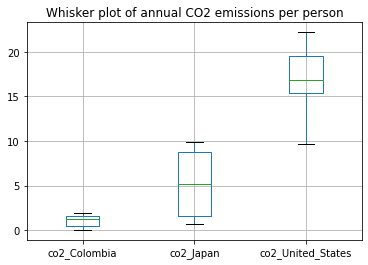

In [30]:
df_co2_emissions.iloc[:,1:].plot(kind="box")
plt.grid()
plt.title("Whisker plot of annual CO2 emissions per person");

Similar information as before, but it is much easier to check and understand the differences between each country here. It can be seen how different the range of values is for each country. It is interesting to see that the maximum value of Colombia is almost equal to the first quartile of Japan, while the maximum value of Japan is almost equal to the minimum value of United States.

But we are interested not only on fixed statistical values, but also in the change with time. So let's create a plot with year as the independent variable.

Since we need to create a plot for the remaining datasets also, let's create a function for plot creation so we avoid duplication of code.

In [31]:
def plot_creation(df, title, units):
    plt.figure(figsize=(12,6))
    for c in df.columns[1:]:
        plt.plot(df["year"], df[c], label=" ".join(c.split("_")[1:]))
    plt.title(title)
    plt.xlabel("Year")
    y_label = " ".join(title.split()[2:])
    plt.ylabel("{} ({})".format(y_label,units))
    plt.grid(True)
    plt.legend()

And now let's use this function with the CO2 emissions dataset.

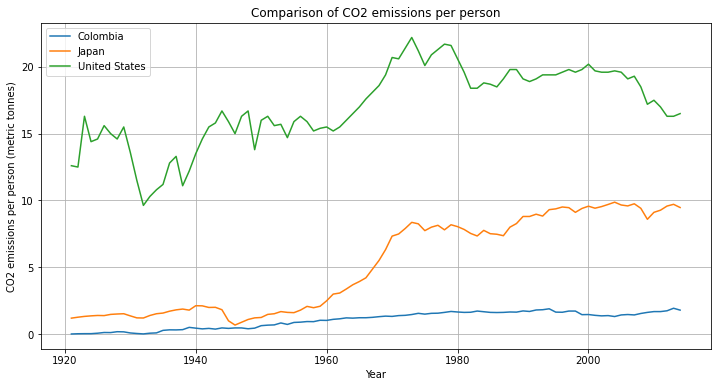

In [32]:
plot_creation(df_co2_emissions, "Comparison of CO2 emissions per person", "metric tonnes")

Ok, now it's much easier to see the difference between each country, and how much the emissions have changed over time. It seems Colombia has not had a significant change during the years included in the dataset, while Japan had a big increase after 1960, and United States has had a big relative value even from the beginning of the years analysed, and also a significant increase after 1960, similar to that of Japan. It's worth noting that the CO2 emissions from United States seem to have declined from the year 2000, but it's sill far bigger than the one for the remaining 2 countries of our study.

### Q2: How do these countries (Colombia, Japan, United States) compare in terms of annual residential electricity use per person?

Let's check some statistical data from the simplified electricity usage dataset.

In [33]:
df_electricity_use.describe()

,year,electricity_Colombia,electricity_Japan,electricity_United_States
count,38.000000,38.000000,38.000000,38.000000
mean,1989.500000,307.394737,1474.894737,3610.789474
std,11.113055,85.675863,530.191286,635.594557
min,1971.000000,132.000000,591.000000,2380.000000
25%,1980.250000,257.250000,1006.750000,3140.000000
50%,1989.500000,333.000000,1465.000000,3650.000000
75%,1998.750000,379.000000,1977.500000,4097.500000
max,2008.000000,405.000000,2280.000000,4620.000000


It seems United States has the higher average (more than twice than Japan,and more the 11 times than Colombia) and also the biggest standard deviation.

Let's create a whisker plot of this dataset.

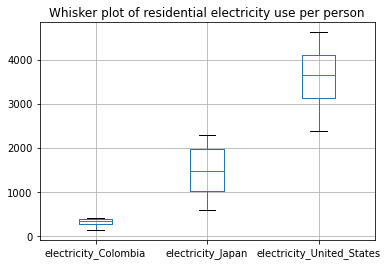

In [34]:
df_electricity_use.iloc[:,1:].plot(kind="box")
plt.grid()
plt.title("Whisker plot of residential electricity use per person");

It can be easily seen how big the difference between United States and the other 2 countries is, especially when compared to Colombia. It is interesting to see that the distributions seem to be very symmetrical, but Colombia has a very small range when compared to te other 2 countries.

Let's create a plot of this dataset.

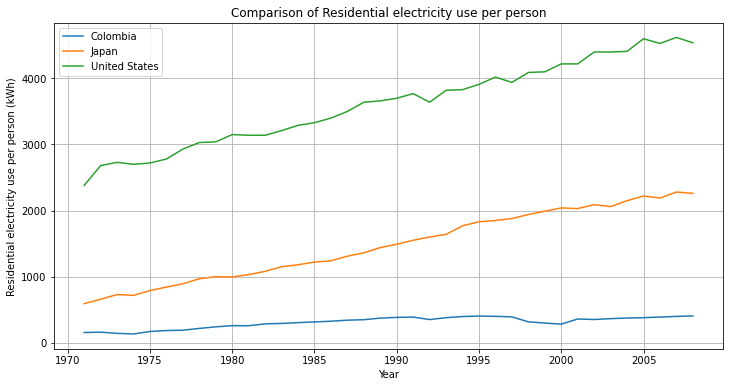

In [35]:
plot_creation(df_electricity_use, "Comparison of Residential electricity use per person", "kWh")

Again,it can be seen how big the difference between United States and the other countries is. Both Japan and United States have had a steady increase over the years, while Colombia has kept a relatively stable smaller value during the period included in the dataset.

### Q3: How do these countries compare in terms of electricity production from renewable resources?

Let's check some statistical data from the simplified electricity usage dataset.

In [36]:
df_renewable_sources.describe()

,year,renewable_Colombia,renewable_Japan,renewable_United_States
count,45.000000,45.000000,45.000000,45.000000
mean,1993.000000,1.271889,1.678889,1.921931
std,13.133926,0.900891,1.595583,1.889834
min,1971.000000,0.000000,0.000000,0.049600
25%,1982.000000,1.010000,1.240000,0.262000
50%,1993.000000,1.070000,1.430000,1.900000
75%,2004.000000,1.150000,1.900000,2.270000
max,2015.000000,4.130000,7.760000,7.390000


Based on these results, it can be seen that the mean is still higher for United States, but this time the difference with the other 2 countries is not as big as the difference found for the previous 2 datasets. Also, the standard deviation is very big for this dataset, almost as big as the average value for Japan and United States.

Let's create a whisker plot.

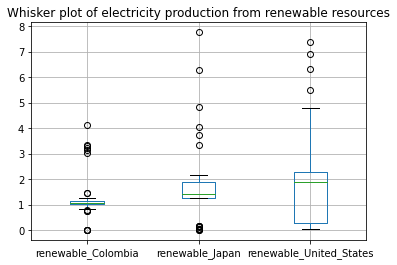

In [37]:
df_renewable_sources.iloc[:,1:].plot(kind="box")
plt.grid()
plt.title("Whisker plot of electricity production from renewable resources");

It allows us to graphically confirm there is no such a big difference between median values for each country, but there is a significant difference in their IQR. Especially, Colombia seems to have a very small IQR. Also, it seems there are many values regarded as outliers, which means they are smaller than $Q1 - 1.5 * IQR$, or bigger than $Q3 + 1.5 * IQR$.

Now, let's create a plot of this dataset.

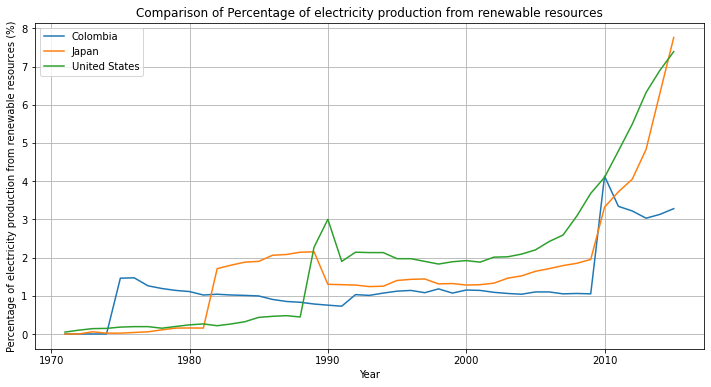

In [38]:
plot_creation(df_renewable_sources, "Comparison of Percentage of electricity production from renewable resources", "%")

From here, it can be seen that Colombia had a big increase in 1975, then became stable aorund 1.2% for several years, and then had another big increase up to 4% in 2010. However, this value decreased up to 3.2 in the following years. As for Japan, there was an increase up to almost 2% in 1982, then a decrease up to to 1.3% in 1990, a period with a similar value for several years, and then a big increase starting from 2010, up to becoming the country with the highest percentage out of the 3 target countries. As for United States, it had some big increments around 1990 and 2006, which made it the country with the biggest percentage for many years, until recently, when it was surpassed by Japan.

<a id='conclusions'></a>
## Conclusions

Based on the results above, it can be said that out of the 3 countries included in this study, Colombia can be considered as the most environmentally friendly, due to the significant differences in CO2 emissions and residential electricity use. But it is worth noting that Colombia is still a developing country, whereas Japan and United States are developed countries, and also that in terms of percentage of electricity production from renewable sources, both Japan and United States have had a bigger percentage during the recent years.

<a id='limitations'></a>
### Note: Limitations

It is important to note that the conclusion above is based only on a very limited set of information, and cannot be considered as decisive. For example, only 3 variables are not enough to fully judge if a country is environmentally friendly or not. Also, the size of each dataset in this study is very small after the removal of missing values (94 rows for the CO2 emissions dataset, 38 rows for the residential electricity use dataset, and 45 rows for the renewable resources dataset), and the range of years only lasts until 2014 for the CO2 emissions dataset, 2008 for the residential electricity use dataset, and 2015 for the renewable resources dataset. In order to reach a more accurate conclusion, it would be needed to consider more variables, and use datasets with more complete and recent data.